<a href="https://colab.research.google.com/github/namwootree/Portfolio/blob/main/Alphaco_(Deep_Learning_Boot_Camp)/Long-Term%20Program/Text_Summarization/Understand_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting

In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155632 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [68]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
+ bash -x
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/lsb-release:DISTRIB_DESCRIPTION="Ubuntu 18.04.5 LTS"
/etc/os-release:NAME="Ubuntu"
/etc/os-release:ID=ubuntu
/etc/os-release:ID_LIKE=debian
/etc/os-release:PRETTY_NAME="Ubuntu 18.04.5 LTS"
/etc/os-release:HOME_URL="https://www.ubuntu.com/"
/etc/os-release:SU

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumSquare')

In [2]:
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

NanumBarunpen = /usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEco.ttf
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRo

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
import json
from pprint import pprint

import pandas as pd
import numpy as np

from tqdm.notebook import tqdm

from konlpy.tag import Mecab
import re

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# json -> df

### Train Data

In [70]:
# context
## AGENDA_NUM : 한 의제에 여러 대화가 존재

# id : 회의록 id

# label : 의제 별 요약문
## AGENDA_NUM
### evidence : 요약 근거
### summary : 요약문 (정답)

# num_agenda : 의제 수
# region : 회의 지역
# title : 회의 주제

train_json_path = '/content/drive/MyDrive/장기 프로젝트/문서 요약/235813_AI 기반 회의 녹취록 요약 경진대회_data/train.json'

with open(train_json_path) as train_file:
  TRAIN_DATA = json.load(train_file)

pprint(TRAIN_DATA[1])

{'context': {'AGENDA_1': {'0': '의석을 정돈하여 주시기 바랍니다. 성원이 되었으므로 제251회 완주군의회 제1차 '
                               '정례회 제1차 본회의 개의를 선포합니다.',
                          '1': '먼저 의사팀장으로부터 의회 관련 사항에 대한 보고가 있겠습니다. 의사팀장은 보고하여 '
                               '주시기 바랍니다.',
                          '10': '완주 혁신도시 출판복합 클러스터 조성에 총력 기울여야.',
                          '11': '존경하는 완주군민 여러분! 최등원 의장님과 선배·동료 의원 여러분! 박성일 '
                                '군수님을 비롯한 공무원 및 관계자 여러분! 더불어민주당 삼례·이서 출신 윤수봉 '
                                '의원입니다. 전북 혁신도시에 출판산업 복합 클러스터를 조성하여 호남권역 및 국내 '
                                '출판산업의 메카로 육성해야 한다는 도민의 염원과 당위성이 고조되고 있습니다. 완주 '
                                '혁신도시의 출판문화산업진흥원이 주축이 되어 해당 부처의 협의를 이끌어내고 '
                                '전라북도와 완주군이 적극 힘을 보탠 결과입니다. 의회 차원에서도 지난 2월 '
                                '전라북도 시군의장단협의회를 통해 본 사안을 촉구하는 건의안을 제시한 바 있습니다. '
                                '전북 혁신도시의 출판복합 클러스터 조성은 두 가지 측면에서 반드시 성사되어야 '
                                '합니다.',
    

In [71]:
train = pd.DataFrame(columns=['uid', 'title', 'region', 'agenda', 'context', 'summary'])

uid = 1000

for data in TRAIN_DATA:

  for agenda in data['context'].keys():
    
    context = ''

    for line in data['context'][agenda]:

      context += data['context'][agenda][line]
      context += ''

    train.loc[uid, 'uid'] = uid
    train.loc[uid, 'title'] = data['title']
    train.loc[uid, 'region'] = data['region']
    train.loc[uid, 'agenda'] = agenda
    train.loc[uid, 'context'] = context[:-1]
    train.loc[uid, 'summary'] = data['label'][agenda]['summary']
    
    uid += 1

train['total'] = train.title + ' ' + train.region + ' ' + train.context

In [72]:
list_title = list(train['title'].unique())
list_id = [2000 + int(i) for i in range(len(list_title))]

for id, title in zip(list_id, list_title):

  cond = (train['title']==title)
  train.loc[cond, 'id'] = id

train = train.astype({'id':'int'})
train = train[['id', 'title', 'region', 'agenda', 'context', 'summary', 'total']]

In [73]:
train.head()

,id,title,region,agenda,context,summary,total
1000,2000,제207회 완주군의회(임시회) 제 1 차 본회의회의록,완주,AGENDA_1,의석을 정돈하여 주시기 바랍니다. 성원이 되었으므로 제207회 완주군의회 임시회 제...,제207회 완주군의회 임시회 제1차 본회의 개의 선포.,제207회 완주군의회(임시회) 제 1 차 본회의회의록 완주 의석을 정돈하여 주시기 ...
1001,2000,제207회 완주군의회(임시회) 제 1 차 본회의회의록,완주,AGENDA_2,의사팀장 수고하셨습니다. 먼저 의사일정 제1항 제207회 완주군의회 임시회 회기 결...,제207회 완주군의회 임시회 회기는 8월 26일부터 9월 4일까지 10일간으로 가결됨.,제207회 완주군의회(임시회) 제 1 차 본회의회의록 완주 의사팀장 수고하셨습니다....
1002,2000,제207회 완주군의회(임시회) 제 1 차 본회의회의록,완주,AGENDA_3,다음은 의사일정 제2항 제207회 완주군의회 임시회 회의록 서명의원 선출의 건을 상...,제207회 완주군의회 임시회 회의록 서명의원으로 최등원 의원과 박웅배 의원이 선출됨.,제207회 완주군의회(임시회) 제 1 차 본회의회의록 완주 다음은 의사일정 제2항 ...
1003,2000,제207회 완주군의회(임시회) 제 1 차 본회의회의록,완주,AGENDA_4,다음은 의사일정 제3항 본회의 휴회의 건을 상정합니다. 상임의원회 의정활동을 위하여...,8월 27일부터 9월 3일까지 8일간 휴회가 가결됨. 제2차 본회의는 9월 4일 오...,제207회 완주군의회(임시회) 제 1 차 본회의회의록 완주 다음은 의사일정 제3항 ...
1004,2001,제251회 완주군의회(제1차 정례회) 제1차 본 회 의 회 의 록,완주,AGENDA_1,의석을 정돈하여 주시기 바랍니다. 성원이 되었으므로 제251회 완주군의회 제1차 정...,제251회 완주군의회 제1차 정례회 제1차 본회의 개의 선포.,제251회 완주군의회(제1차 정례회) 제1차 본 회 의 회 의 록 완주 의석을 정돈...


In [74]:
train.shape

(2994, 7)

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2994 entries, 1000 to 3993
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       2994 non-null   int64 
 1   title    2994 non-null   object
 2   region   2994 non-null   object
 3   agenda   2994 non-null   object
 4   context  2994 non-null   object
 5   summary  2994 non-null   object
 6   total    2994 non-null   object
dtypes: int64(1), object(6)
memory usage: 251.7+ KB


In [76]:
train['context'].nunique()

2994

In [77]:
train.to_csv('train_df.csv')

### Test Data

In [78]:
# context
## AGENDA_NUM : 한 의제에 여러 대화가 존재

# id : 회의록 id
# num_agenda : 의제 수
# region : 회의 지역
# title : 회의 주제

test_json_path = '/content/drive/MyDrive/장기 프로젝트/문서 요약/235813_AI 기반 회의 녹취록 요약 경진대회_data/test.json'

with open(test_json_path) as test_file:
  TEST_DATA = json.load(test_file)

pprint(TEST_DATA[0])

{'context': {'AGENDA_1': {'0': '의석을 정돈하여 주시기 바랍니다.',
                          '1': '성원이 되었으므로 지금부터 음성군의회 제235회 제1차 정례회 제1차 본회의를 '
                               '개의하겠습니다.',
                          '2': '먼저 의회사무과장으로부터 보고가 있겠습니다.',
                          '3': '의회사무과장입니다. 먼저 지난 제234회 임시회 제1차 본회의에서 의결하여 이송한 '
                               '안건에 대해서 보고를 드리겠습니다. 2012년 5월 29일 제1차 본회의에서 '
                               '의결하여 이송한 음성군 지방공무원 정원 조례 일부개정조례안은 2012년 6월 '
                               '15일자로 공포되었습니다.',
                          '4': '다음은 제235회 제1차 정례회 제1차 본회의와 관련하여 보고 드리겠습니다. '
                               '「지방자치법」제44조 및 「음성군 회기와 그 운영 등에 관한 조례」제4조제1항에 '
                               '따라 정례회를 개최하고자 6월 10일자로 집회공고를 하였습니다.',
                          '5': '6월 14일 이대웅 의원님 외 2분의 의원님으로 환경분야 현지확인 특별위원회 구성 '
                               '결의안이, 손달섭 의원님 외 2분의 의원님으로부터 제234회 임시회 시 활동한 '
                               '주요사업 현지확인 결과 보고의 건이 각각 접수되었습니다.',
                          '6': '음성

In [79]:
test = pd.DataFrame(columns=['uid', 'title', 'region', 'agenda', 'context'])
uid = 2000
for data in TEST_DATA:

    for agenda in data['context'].keys():

        context = ''

        for line in data['context'][agenda]:

            context += data['context'][agenda][line]
            context += ' '

        test.loc[uid, 'uid'] = uid
        test.loc[uid, 'title'] = data['title']
        test.loc[uid, 'region'] = data['region']
        test.loc[uid, 'agenda'] = agenda
        test.loc[uid, 'context'] = context[:-1]
        
        uid += 1
  
test['total'] = test.title + ' ' + test.region + ' ' + test.context

In [80]:
list_title = list(test['title'].unique())
list_id = [2000 + int(i) for i in range(len(list_title))]

for id, title in zip(list_id, list_title):

  cond = (test['title']==title)
  test.loc[cond, 'id'] = id

test = test.astype({'id':'int'})
test = test[['id', 'title', 'region', 'agenda', 'context', 'total']]

In [81]:
test.head()

,id,title,region,agenda,context,total
2000,2000,제235회 본회의 제1차(2012.06.21.),음성,AGENDA_1,의석을 정돈하여 주시기 바랍니다. 성원이 되었으므로 지금부터 음성군의회 제235회 ...,제235회 본회의 제1차(2012.06.21.) 음성 의석을 정돈하여 주시기 ...
2001,2000,제235회 본회의 제1차(2012.06.21.),음성,AGENDA_2,"의사일정 제1항, 음성군의회 제235회 제1차 정례회 회기결정의 건을 상정합니다. ...","제235회 본회의 제1차(2012.06.21.) 음성 의사일정 제1항, 음성군..."
2002,2000,제235회 본회의 제1차(2012.06.21.),음성,AGENDA_3,"의사일정 제2항, 회의록 서명의원 선출의 건을 상정합니다. 제235회 제1차 정례회...","제235회 본회의 제1차(2012.06.21.) 음성 의사일정 제2항, 회의록..."
2003,2000,제235회 본회의 제1차(2012.06.21.),음성,AGENDA_4,"의사일정 제3항, 예산결산특별위원회 구성의 건을 상정합니다. 예산결산특별위원회 구성...","제235회 본회의 제1차(2012.06.21.) 음성 의사일정 제3항, 예산결..."
2004,2000,제235회 본회의 제1차(2012.06.21.),음성,AGENDA_5,"의사일정 제4항, 환경분야 현지확인 특별위원회 구성결의안을 상정합니다. 대표발의하신...","제235회 본회의 제1차(2012.06.21.) 음성 의사일정 제4항, 환경분..."


In [82]:
test.shape

(506, 6)

In [83]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 2000 to 2505
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       506 non-null    int64 
 1   title    506 non-null    object
 2   region   506 non-null    object
 3   agenda   506 non-null    object
 4   context  506 non-null    object
 5   total    506 non-null    object
dtypes: int64(1), object(5)
memory usage: 43.8+ KB


In [84]:
test['context'].nunique()

506

In [85]:
test.to_csv('test_df.csv')

# Visualization

### Visual Setting

In [86]:
tokenizer = Mecab()

In [147]:
def lenght_count_sentence(sentence, tokenizer):

  lenght_list = []
  clean = re.sub('[^0-9a-zA-Z一-龥ㄱ-ㅎ가-힣ㅏ-ㅣ\\s]', '', sentence)
  word_list = tokenizer.morphs(clean)

  lenght = 0

  for token in word_list:
    lenght += len(token)

  count = len(word_list)

  return lenght, count

In [148]:
dict_train = {
    'id' : list(train['id']),
    'agenda' : list(train['agenda']),
    'context' : list(train['context']),
    'summary' : list(train['summary']),
    'context_lenght' : [],
    'summary_lenght' : [],
    'context_count' : [],
    'summary_count' : []
              }

for con_sentence, sum_sentence in tqdm(zip(train['context'], train['summary'])) :
  
  context_lenght, context_count = lenght_count_sentence(con_sentence, tokenizer)
  dict_train['context_lenght'].append(context_lenght)
  dict_train['context_count'].append(context_count)

  summary_lenght, summary_count = lenght_count_sentence(sum_sentence, tokenizer)
  dict_train['summary_lenght'].append(summary_lenght)
  dict_train['summary_count'].append(summary_count)

train_length_info = pd.DataFrame(dict_train)
train_length_info.reset_index(inplace=True)

train_length_info['context_mean'] = [np.mean(list(train_length_info['context_lenght']))] * train_length_info.shape[0]
train_length_info['summary_mean'] = [np.mean(list(train_length_info['summary_lenght']))] * train_length_info.shape[0]

train_length_info.sort_values(by=['context_lenght', 'summary_lenght'], ascending=[False, False], inplace=True)

0it [00:00, ?it/s]

In [149]:
display(train_length_info.head(), train_length_info.tail())

,index,id,agenda,context,summary,context_lenght,summary_lenght,context_count,summary_count,context_mean,summary_mean
211,211,2038,AGENDA_9,문화공보과장입니다. 2008년도 하반기 주요업무계획을 보고 드리겠습니다. 보고 드릴...,관내 어르신 장수사진 촬영의 경우 사회복지과와 기획감사실에서도 유사한 사업을 하니 ...,9863,50,5940,32,1055.326987,61.670007
937,937,2152,AGENDA_10,"의사일정 제10항, 음성군 농업인 지원시설 운영ㆍ관리조례안을 상정합니다.농정과장님께...","음성군 농업인 지원시설 운영, 관리 조례안은 기 농업 관련 조례들을 폐지하면서 업무...",9682,97,5990,60,1055.326987,61.670007
98,98,2021,AGENDA_9,농정과장 유인상입니다. 농정과 소관 2019년도 주요 현안사업에 대해 보고드리겠습니...,수박 후작으로 방울토마토 재배하우스가 증가하는 만큼 내년에는 방울토마토 명품화 사업...,9652,151,6002,91,1055.326987,61.670007
2066,2066,2323,AGENDA_4,보건소장입니다. 보건소 2016년도 하반기주요 업무를 보고드리겠습니다.(「2016년...,주민이 혼동하지 않도록 성심병원 자리 새로 병원이 들어선다는 플래카드 붙인 것을 철...,9590,168,6017,99,1055.326987,61.670007
208,208,2038,AGENDA_6,기획감사실장 이장해입니다.2008년 하반기 주요업무를 보고 드리겠습니다. 보고드릴 ...,권역별로 있는 중고등학교도 명문을 만들기 위해서 군에서도 지역과 균형을 맞출 것.,9212,34,5535,22,1055.326987,61.670007


,index,id,agenda,context,summary,context_lenght,summary_lenght,context_count,summary_count,context_mean,summary_mean
940,940,2153,AGENDA_1,의석을 정돈해 주시기 바랍니다. 성원이 되었으므로 제55회 청주시의회(임시회) 제1...,제55회 청주시의회(임시회) 제1차 본회의 개의 선포.,47,22,29,15,1055.326987,61.670007
1548,1548,2248,AGENDA_1,의석을 정돈해 주시기 바랍니다. 성원이 되었으므로 제58회 청주시의회(임시회) 제1...,제58회 청주시의회(임시회) 제1차 본회의 개의 선포.,47,22,29,15,1055.326987,61.670007
1980,1980,2312,AGENDA_1,의석을 정돈해 주시기 바랍니다. 성원이 되었으므로 제42회 청주시의회(임시회) 제1...,제42회 청주시의회(임시회) 제1차 본회의 개의 선포.,47,22,29,15,1055.326987,61.670007
1501,1501,2240,AGENDA_1,의석을 정돈해 주시기 바랍니다. 성원이 되었으므로 제49회 청주시의회(임시회) 제1...,제49회 청주시의회 제1차 본회의 개의 선포.,47,19,29,13,1055.326987,61.670007
1906,1906,2301,AGENDA_1,성원이 되었으므로 제184회 완주군의회 임시회 제2차 본회의 개의를 선포합니다,제184회 완주군의회 임시회 제2차 본회의 개의 선포.,35,23,20,14,1055.326987,61.670007


### Context 문장 길이

Text(0.5, 1.0, 'Context 별 문장 길이')

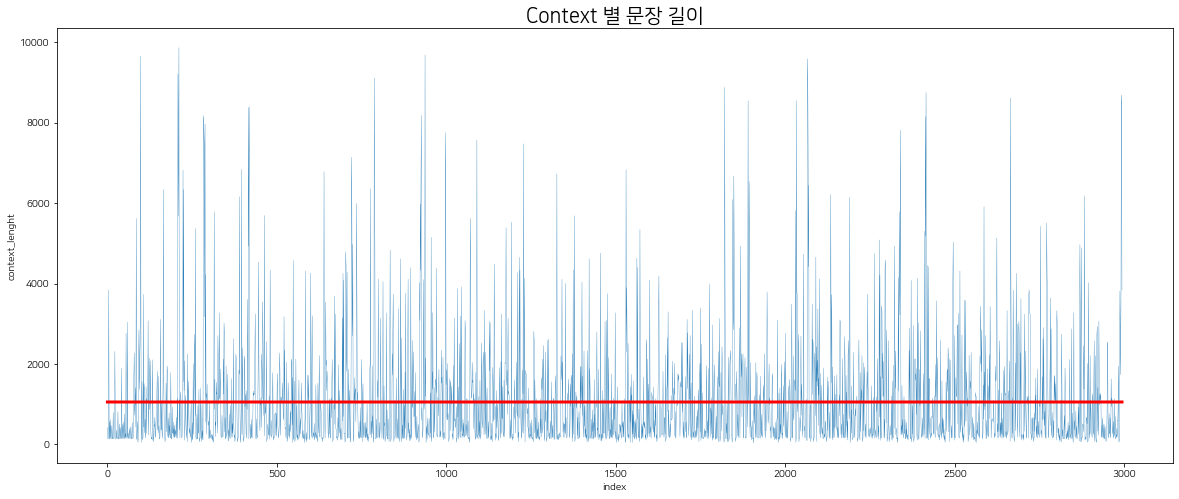

In [142]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=train_length_info, x='index', y='context_lenght', linewidth=0.3)
sns.lineplot(data=train_length_info, x='index', y='context_mean', color='red', linewidth=3)
plt.title('Context 별 문장 길이', fontsize=20)

In [143]:
min_length = train_length_info['context_lenght'].min()
max_length = train_length_info['context_lenght'].max()

print(f'가장 짧은 문장 길이 : {min_length}')
print(f'가장 긴 문장 길이 : {max_length}')

가장 짧은 문장 길이 : 35
가장 긴 문장 길이 : 9863


### Summary 문장 길이

Text(0.5, 1.0, 'Summary 별 문장 길이')

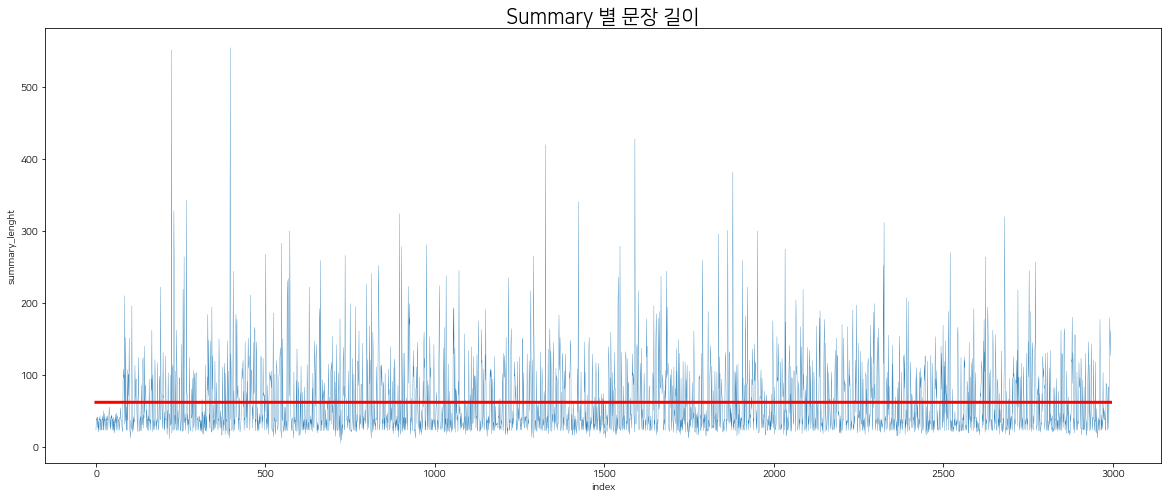

In [144]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=train_length_info, x='index', y='summary_lenght', linewidth=0.3)
sns.lineplot(data=train_length_info, x='index', y='summary_mean', color='red', linewidth=3)
plt.title('Summary 별 문장 길이', fontsize=20)

In [145]:
min_length = train_length_info['summary_lenght'].min()
max_length = train_length_info['summary_lenght'].max()

print(f'가장 짧은 문장 길이 : {min_length}')
print(f'가장 긴 문장 길이 : {max_length}')

가장 짧은 문장 길이 : 5
가장 긴 문장 길이 : 555


### Context 단어 개수

Text(0.5, 1.0, 'Context 별 단어 개수')

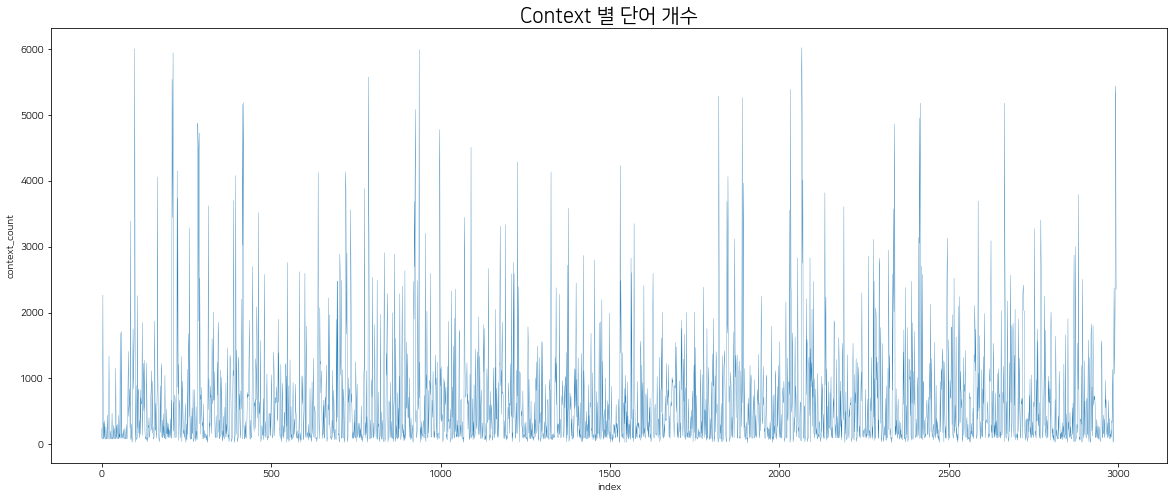

In [150]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=train_length_info, x='index', y='context_count', linewidth=0.3)
plt.title('Context 별 단어 개수', fontsize=20)

In [151]:
min_count = train_length_info['context_count'].min()
max_count = train_length_info['context_count'].max()

print(f'가장 적은 단어 개수 : {min_count}')
print(f'가장 많은 단어 개수: {max_count}')

가장 적은 단어 개수 : 20
가장 많은 단어 개수: 6017


### Summary 단어 개수

Text(0.5, 1.0, 'summary 별 단어 개수')

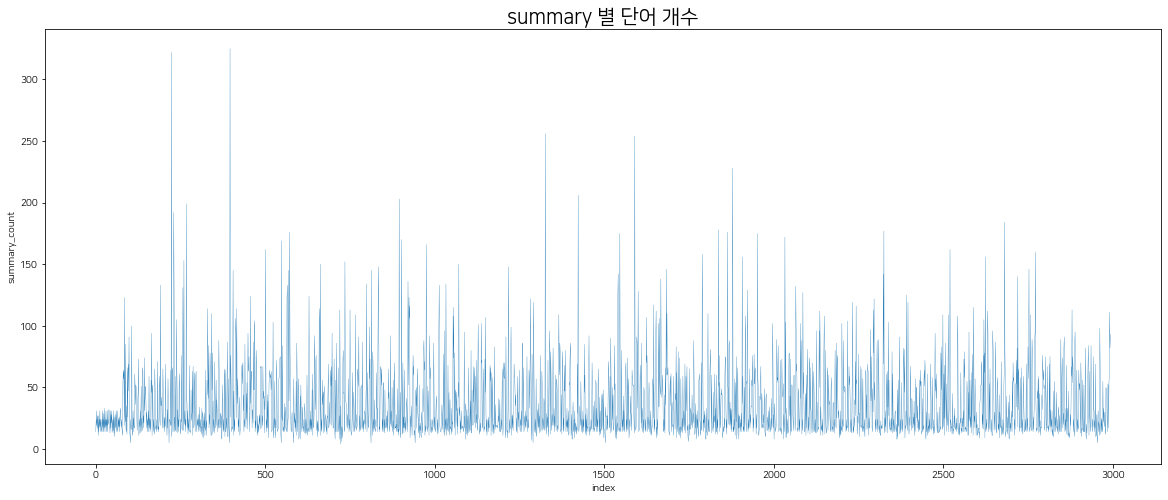

In [152]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=train_length_info, x='index', y='summary_count', linewidth=0.3)
plt.title('summary 별 단어 개수', fontsize=20)

In [153]:
min_count = train_length_info['summary_count'].min()
max_count = train_length_info['summary_count'].max()

print(f'가장 적은 단어 개수 : {min_count}')
print(f'가장 많은 단어 개수: {max_count}')

가장 적은 단어 개수 : 4
가장 많은 단어 개수: 325


### Context 및 Summary 길이 비교

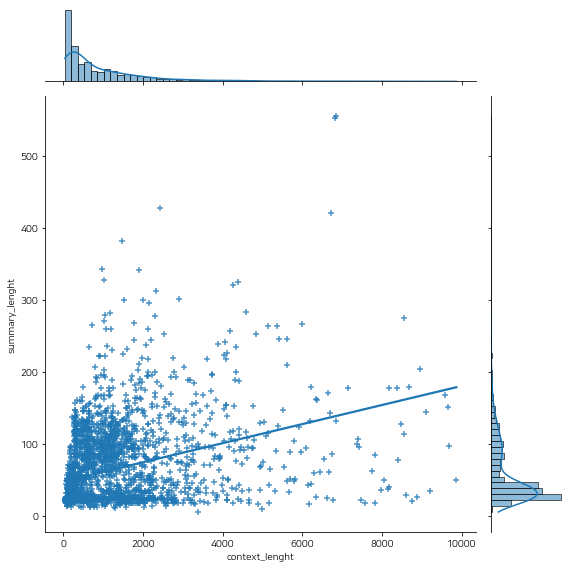

In [228]:
sns.jointplot(x='context_lenght',
              y='summary_lenght',
              data=train_length_info,
              kind='reg',
              marker='+',
              height=8,
              ci=False)

# 문장 길이 1024 이하 데이터 확인

In [233]:
cond_1024 = (train_length_info['context_lenght'] <= 1024)

train_1024 = train_length_info.loc[cond_1024]

In [234]:
train_1024.head()

,index,id,agenda,context,summary,context_lenght,summary_lenght,context_count,summary_count,context_mean,summary_mean
2366,2366,2369,AGENDA_1,"안녕하십니까? 의사팀장 이은미입니다.먼저, 의원님들의 제8대 완주군의회 등원을 진심...",제8대 완주군의회 첫 임시회 개의 선포.,1024,16,606,10,1055.326987,61.670007
1205,1205,2193,AGENDA_11,"의사일정 제10항, 음성군 시험수당 지급 조례 일부개정조례안을 상정합니다.자치행정과...",음성군 시험수당 지급 조례 일부개정조례안은 음성군에서 실시하는 각종 시험업무에 종사...,1022,99,590,57,1055.326987,61.670007
1670,1670,2265,AGENDA_15,"의사일정 제16항, 음성군 보건진료소 운영협의회 조례 일부개정조례안을 상정합니다.보...",음성군 보건진료소 운영협의회 조례 일부개정조례안은 자치법규 정비기준에 따라 용어를 ...,1022,74,590,42,1055.326987,61.670007
1892,1892,2298,AGENDA_11,안전총괄과장입니다. 2015년도 행정사무감사 시정ㆍ건의사항 조치결과를 보고드리겠습니...,안전총괄과 2015년도 행정사무감사 시정 및 건의사항 조치결과 보고.,1022,30,630,18,1055.326987,61.670007
1605,1605,2256,AGENDA_4,"의사일정 제3항, 음성군 화장 장려금 지원 조례안을 상정합니다.대표발의하신 조천희 ...","음성군 화장 장려금 지원 조례안은 관내 묘지 증가에 따른 국토의 훼손을 방지하고, ...",1018,77,625,46,1055.326987,61.670007


In [235]:
train_1024.shape

(1968, 11)

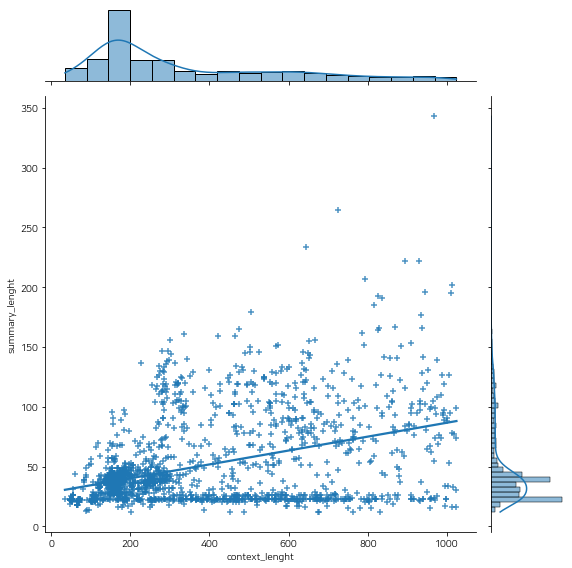

In [236]:
sns.jointplot(x='context_lenght',
              y='summary_lenght',
              data=train_1024,
              kind='reg',
              marker='+',
              height=8,
              ci=False)